In [24]:
import baostock as bs
import pandas as pd

In [25]:
#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

login success!
login respond error_code:0
login respond  error_msg:success


In [26]:
#### 获取历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节
rs = bs.query_history_k_data_plus("sh.600000",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST",
    start_date='2020-01-01', end_date='2020-03-01', 
    frequency="d", adjustflag="3") #frequency="d"取日k线，adjustflag="3"默认不复权
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


In [27]:
#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
#### 结果集输出到csv文件 ####
# result.to_csv("D:/history_k_data.csv", encoding="gbk", index=False)
print(result)

          date       code     open     high      low    close preclose  \
0   2020-01-02  sh.600000  12.4700  12.6400  12.4500  12.4700  12.3700   
1   2020-01-03  sh.600000  12.5700  12.6300  12.4700  12.6000  12.4700   
2   2020-01-06  sh.600000  12.5200  12.6500  12.4200  12.4600  12.6000   
3   2020-01-07  sh.600000  12.5100  12.6000  12.4600  12.5000  12.4600   
4   2020-01-08  sh.600000  12.4100  12.4500  12.2500  12.3200  12.5000   
5   2020-01-09  sh.600000  12.3900  12.4300  12.3500  12.3700  12.3200   
6   2020-01-10  sh.600000  12.3700  12.4200  12.3100  12.3900  12.3700   
7   2020-01-13  sh.600000  12.4000  12.4100  12.3100  12.4100  12.3900   
8   2020-01-14  sh.600000  12.4000  12.6900  12.3900  12.4300  12.4100   
9   2020-01-15  sh.600000  12.4100  12.4500  12.2500  12.2500  12.4300   
10  2020-01-16  sh.600000  12.2800  12.3100  12.1600  12.2000  12.2500   
11  2020-01-17  sh.600000  12.2200  12.2900  12.1600  12.2300  12.2000   
12  2020-01-20  sh.600000  12.2600  12

In [31]:
import matplotlib.pyplot as plt
X = result['date']
X

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
5     2020-01-09
6     2020-01-10
7     2020-01-13
8     2020-01-14
9     2020-01-15
10    2020-01-16
11    2020-01-17
12    2020-01-20
13    2020-01-21
14    2020-01-22
15    2020-01-23
16    2020-02-03
17    2020-02-04
18    2020-02-05
19    2020-02-06
20    2020-02-07
21    2020-02-10
22    2020-02-11
23    2020-02-12
24    2020-02-13
25    2020-02-14
26    2020-02-17
27    2020-02-18
28    2020-02-19
29    2020-02-20
30    2020-02-21
31    2020-02-24
32    2020-02-25
33    2020-02-26
34    2020-02-27
35    2020-02-28
Name: date, dtype: object

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
5     2020-01-09
6     2020-01-10
7     2020-01-13
8     2020-01-14
9     2020-01-15
10    2020-01-16
11    2020-01-17
12    2020-01-20
13    2020-01-21
14    2020-01-22
15    2020-01-23
16    2020-02-03
17    2020-02-04
18    2020-02-05
19    2020-02-06
20    2020-02-07
21    2020-02-10
22    2020-02-11
23    2020-02-12
24    2020-02-13
25    2020-02-14
26    2020-02-17
27    2020-02-18
28    2020-02-19
29    2020-02-20
30    2020-02-21
31    2020-02-24
32    2020-02-25
33    2020-02-26
34    2020-02-27
35    2020-02-28
Name: date, dtype: object

In [36]:
valueList = []
for day in range(len(result['close'])):
    valueList.append(float(result['close'][day])-float(result['open'][day]))
y = valueList

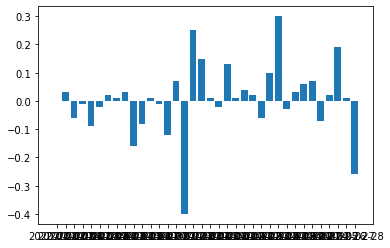

In [37]:
plt.bar(X, y)
plt.show()

In [38]:
res = 0
for i in y:
    res += i
res

0.16999999999999638